/var/folders/4t/47wt24490m52zgk23b06kc9m0000gn/T/ipykernel_40549/2592036790.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


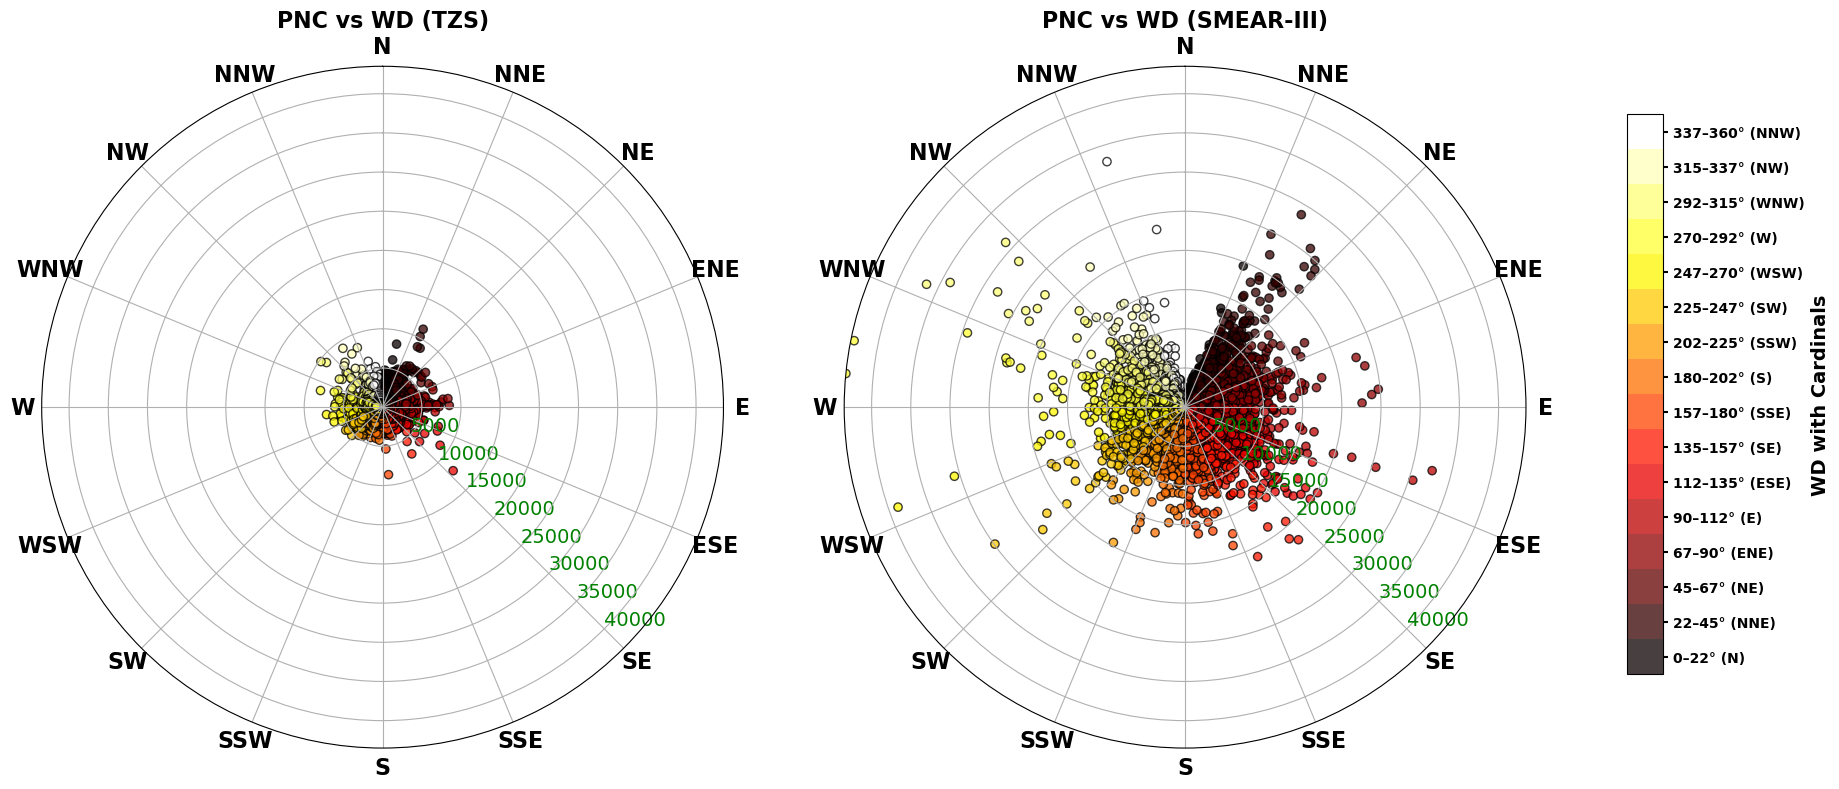

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Load Data ---
file_path = '/Users/touqeergill/Desktop/1. Polar plot TZS + SMEAR.xlsx'
df_tzs = pd.read_excel(file_path, sheet_name="TZS")
df_smear = pd.read_excel(file_path, sheet_name="SMEAR")

# --- Clean Data ---
df_tzs_clean = df_tzs.dropna(subset=['wd']).copy()
df_smear_clean = df_smear.dropna(subset=['wd']).copy()

# --- Define Wind Sectors and Labels ---
direction_bins = np.arange(0, 361, 22.5)
bin_labels = [f'{int(direction_bins[i])}–{int(direction_bins[i+1])}' for i in range(len(direction_bins) - 1)]
cardinal_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                   'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
sorted_labels = sorted(bin_labels, key=lambda x: int(x.split('–')[0]))
label_to_index = {label: i for i, label in enumerate(sorted_labels)}
full_labels = [f'{deg}° ({card})' for deg, card in zip(sorted_labels, cardinal_labels)]

# --- Bin Wind Directions ---
for df in [df_tzs_clean, df_smear_clean]:
    df['Wind_Sector'] = pd.cut(
        df['wd'], bins=direction_bins, labels=bin_labels,
        include_lowest=True, right=False
    )
    df['Sector_Index'] = df['Wind_Sector'].map(label_to_index)

# --- Colormap Setup ---
cmap_hot = plt.cm.get_cmap('hot', 16)
norm_hot = mcolors.BoundaryNorm(np.arange(-0.5, 16.5, 1), cmap_hot.N)

# --- Convert Wind Direction to Radians ---
theta_tzs = np.deg2rad(df_tzs_clean['wd'])
theta_smear = np.deg2rad(df_smear_clean['wd'])

# --- Shared Max PNC ---
max_pnc = max(df_tzs_clean['PNC'].max(), df_smear_clean['PNC'].max())

# --- Plotting ---
fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(18, 8))

# --- TZS Plot (Left) ---
sc1 = axs[0].scatter(
    theta_tzs, df_tzs_clean['PNC'],
    c=df_tzs_clean['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
    alpha=0.75, edgecolors='k', marker='o'
)
axs[0].set_title('PNC vs WD (TZS)', fontsize=16, fontweight='bold')
axs[0].set_theta_zero_location('N')
axs[0].set_theta_direction(-1)
axs[0].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
axs[0].set_xticklabels(cardinal_labels, fontsize=16, fontweight='bold')
axs[0].set_ylim(0, max_pnc)
axs[0].set_rlabel_position(135)
axs[0].tick_params(axis='y', labelsize=14, labelcolor='green')

# --- SMEAR Plot (Right) ---
sc2 = axs[1].scatter(
    theta_smear, df_smear_clean['PNC'],
    c=df_smear_clean['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
    alpha=0.75, edgecolors='k', marker='o'
)
axs[1].set_title('PNC vs WD (SMEAR-III)', fontsize=16, fontweight='bold')
axs[1].set_theta_zero_location('N')
axs[1].set_theta_direction(-1)
axs[1].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
axs[1].set_xticklabels(cardinal_labels, fontsize=16, fontweight='bold')
axs[1].set_ylim(0, max_pnc)
axs[1].set_rlabel_position(135)
axs[1].tick_params(axis='y', labelsize=14, labelcolor='green')

# --- Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sc2, cax=cbar_ax, ticks=np.arange(len(full_labels)))
cbar.ax.set_yticklabels(full_labels, fontsize=10, fontweight='bold')
cbar.set_label('WD with Cardinals', fontsize=14, fontweight='bold')
cbar.ax.tick_params(width=1.5)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/var/folders/4t/47wt24490m52zgk23b06kc9m0000gn/T/ipykernel_40549/3275110523.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


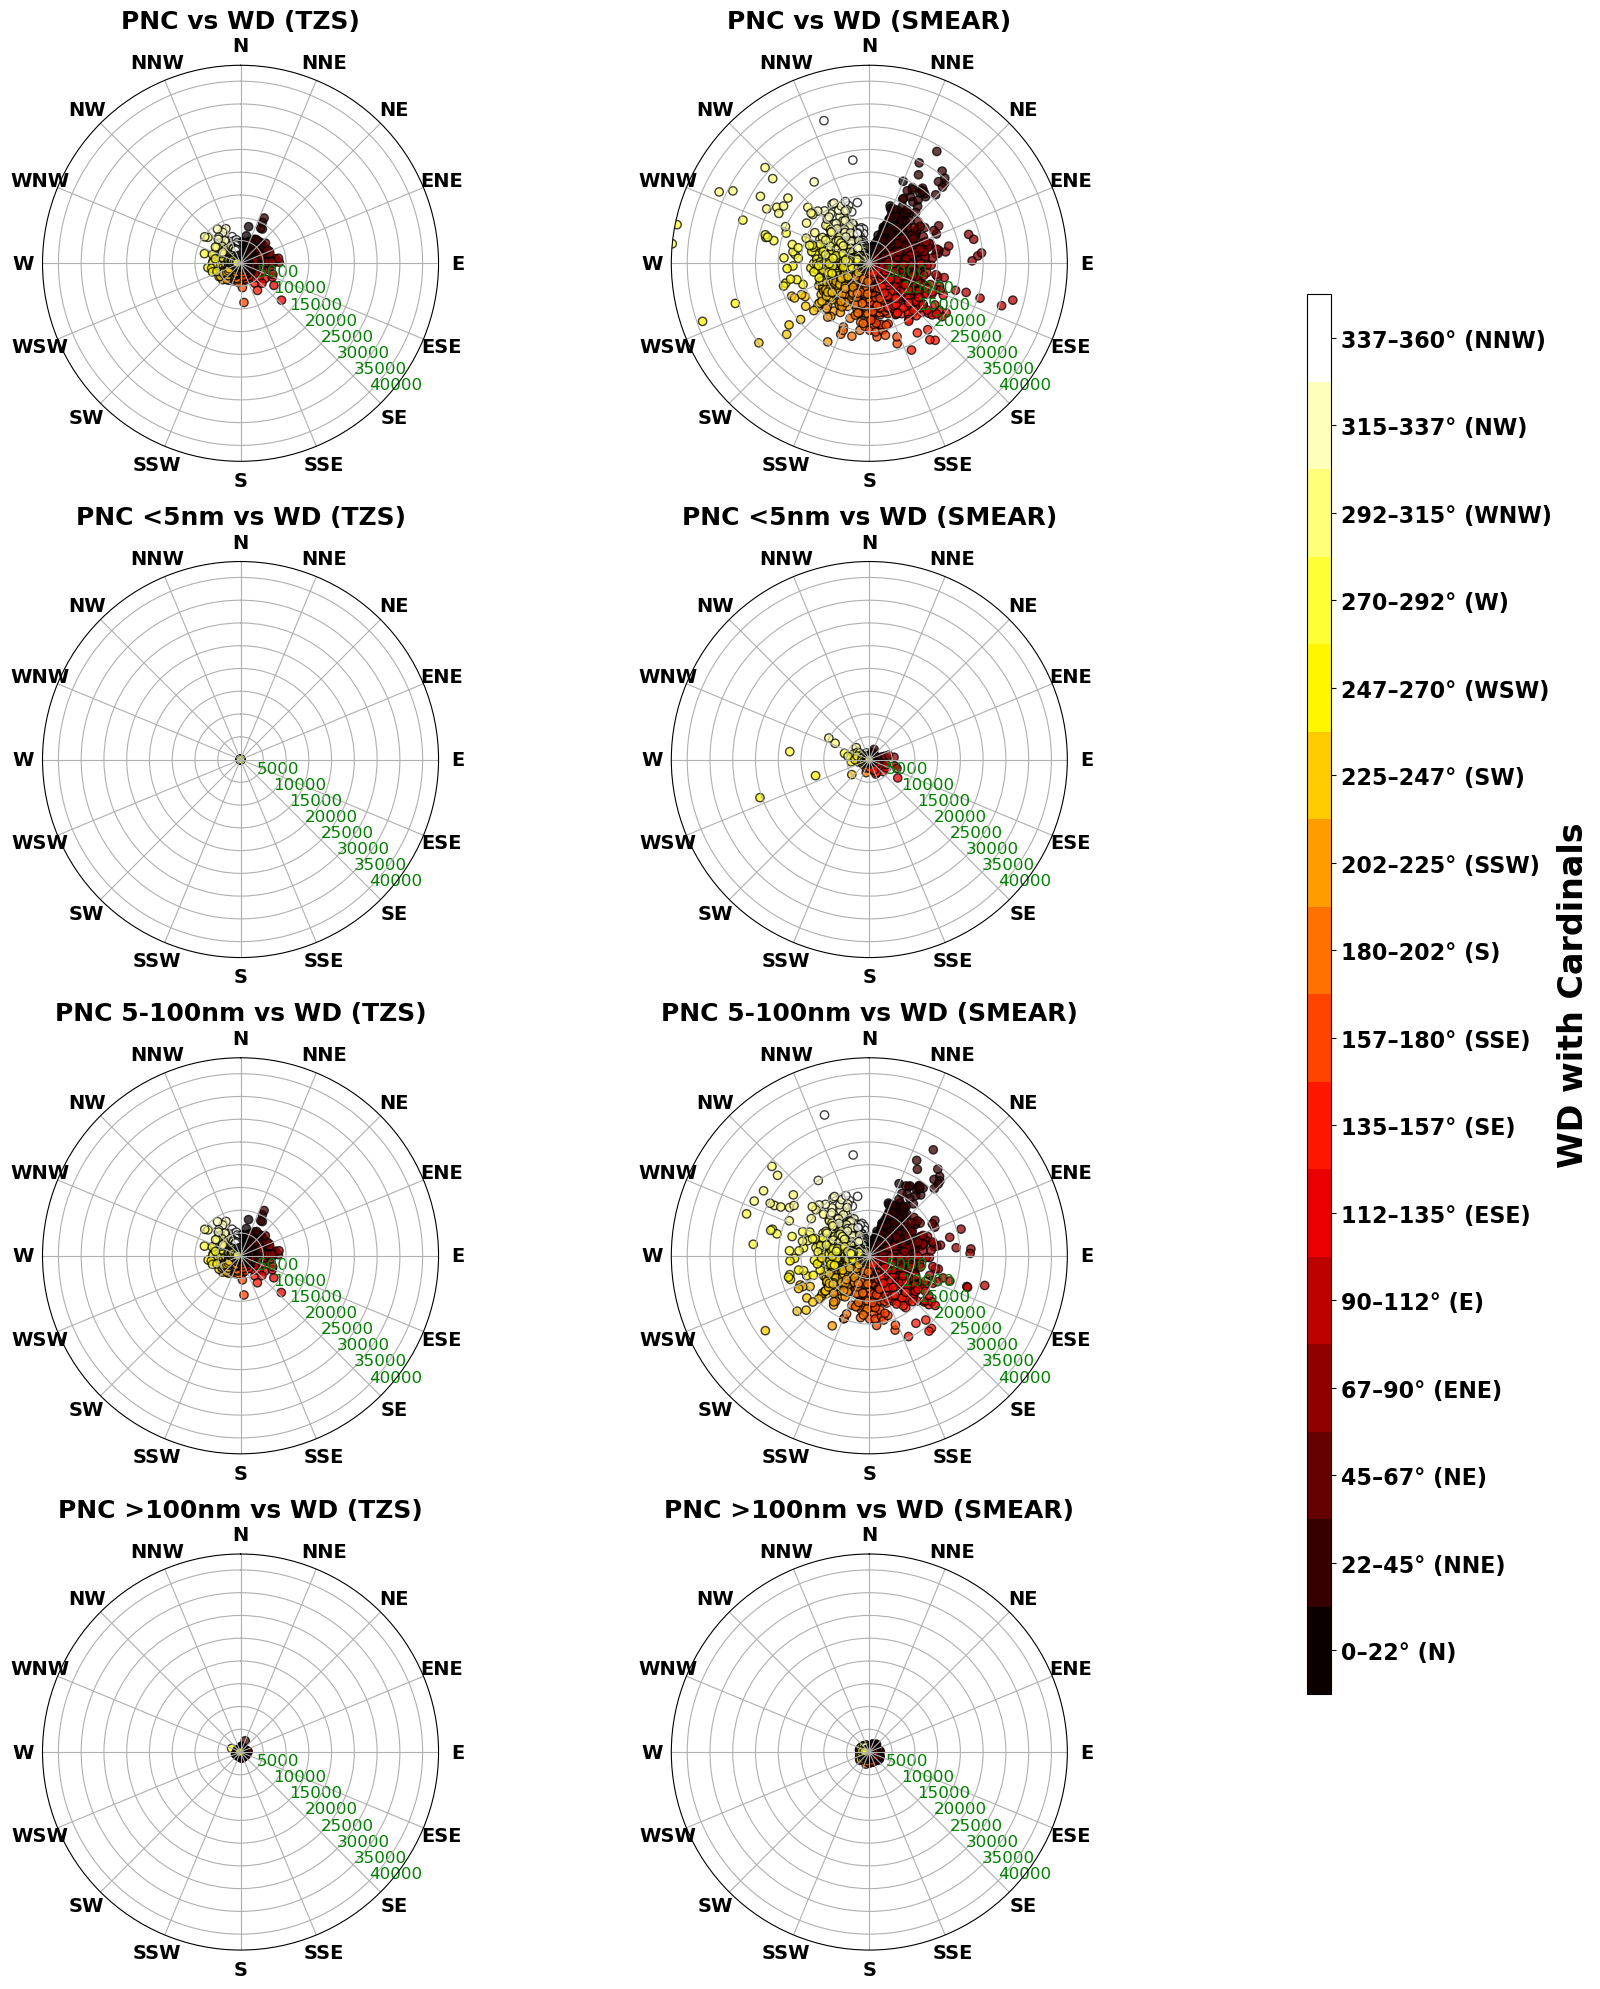

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- File Path ---
file_path = '/Users/touqeergill/Desktop/2. Polar plot TZS + SMEAR.xlsx'

# --- Define Sheet Info ---
sheet_info = [
    ('TZS (PNC)', 'SMEAR (PNC)', 'PNC'),
    ('TZS (PNC5nm)', 'SMEAR (PNC5nm)', 'PNC_below_5nm'),
    ('TZS (PNC5-100nm)', 'SMEAR (PNC5-100nm)', 'PNC_5_to_100nm'),
    ('TZS (PNC100nm)', 'SMEAR (PNC100nm)', 'PNC_above_100nm')
]

# --- Load Data ---
data_pairs = []
for tzs_sheet, smear_sheet, pnc_col in sheet_info:
    tzs_df = pd.read_excel(file_path, sheet_name=tzs_sheet).dropna(subset=['wd', pnc_col])
    smear_df = pd.read_excel(file_path, sheet_name=smear_sheet).dropna(subset=['wd', pnc_col])
    data_pairs.append((tzs_df, smear_df, pnc_col))

# --- Define Wind Sectors and Labels ---
direction_bins = np.arange(0, 361, 22.5)
bin_labels = [f'{int(direction_bins[i])}–{int(direction_bins[i+1])}' for i in range(len(direction_bins) - 1)]
cardinal_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                   'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
sorted_labels = sorted(bin_labels, key=lambda x: int(x.split('–')[0]))
label_to_index = {label: i for i, label in enumerate(sorted_labels)}
full_labels = [f'{deg}° ({card})' for deg, card in zip(sorted_labels, cardinal_labels)]

# --- Bin Wind Directions ---
for tzs_df, smear_df, _ in data_pairs:
    for df in [tzs_df, smear_df]:
        df['Wind_Sector'] = pd.cut(
            df['wd'], bins=direction_bins, labels=bin_labels,
            include_lowest=True, right=False
        )
        df['Sector_Index'] = df['Wind_Sector'].map(label_to_index)

# --- Colormap Setup ---
cmap_hot = plt.cm.get_cmap('hot', 16)
norm_hot = mcolors.BoundaryNorm(np.arange(-0.5, 16.5, 1), cmap_hot.N)

# --- Determine Max PNC ---
max_pnc = max(max(tzs_df[pnc_col].max(), smear_df[pnc_col].max())
              for tzs_df, smear_df, pnc_col in data_pairs)

# --- Plotting Setup ---
fig, axs = plt.subplots(4, 2, subplot_kw=dict(polar=True), figsize=(16, 20))
titles = ['PNC', 'PNC <5nm', 'PNC 5-100nm', 'PNC >100nm']

# --- Plot Each Pair ---
for i, ((tzs_df, smear_df, pnc_col), row_axes, title) in enumerate(zip(data_pairs, axs, titles)):
    theta_tzs = np.deg2rad(tzs_df['wd'])
    theta_smear = np.deg2rad(smear_df['wd'])

    # --- TZS Plot (Left) ---
    row_axes[0].scatter(
        theta_tzs, tzs_df[pnc_col],
        c=tzs_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.75, edgecolors='k', marker='o'
    )
    row_axes[0].set_title(f'{title} vs WD (TZS)', fontsize=18, fontweight='bold')
    row_axes[0].set_theta_zero_location('N')
    row_axes[0].set_theta_direction(-1)
    row_axes[0].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
    row_axes[0].set_xticklabels(cardinal_labels, fontsize=14, fontweight='bold')
    row_axes[0].set_ylim(0, max_pnc)
    row_axes[0].set_rlabel_position(135)
    row_axes[0].tick_params(axis='y', labelsize=12, labelcolor='green')

    # --- SMEAR Plot (Right) ---
    row_axes[1].scatter(
        theta_smear, smear_df[pnc_col],
        c=smear_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.75, edgecolors='k', marker='o'
    )
    row_axes[1].set_title(f'{title} vs WD (SMEAR)', fontsize=18, fontweight='bold')
    row_axes[1].set_theta_zero_location('N')
    row_axes[1].set_theta_direction(-1)
    row_axes[1].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
    row_axes[1].set_xticklabels(cardinal_labels, fontsize=14, fontweight='bold')
    row_axes[1].set_ylim(0, max_pnc)
    row_axes[1].set_rlabel_position(135)
    row_axes[1].tick_params(axis='y', labelsize=12, labelcolor='green')

# --- Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sc_for_colorbar = axs[0, 1].scatter([], [], c=[], cmap=cmap_hot, norm=norm_hot)
cbar = plt.colorbar(sc_for_colorbar, cax=cbar_ax, ticks=np.arange(len(full_labels)))
cbar.ax.set_yticklabels(full_labels, fontsize=16, fontweight='bold')
cbar.set_label('WD with Cardinals', fontsize=24, fontweight='bold')

# --- Final Layout ---
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/var/folders/4t/47wt24490m52zgk23b06kc9m0000gn/T/ipykernel_40549/3400034387.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


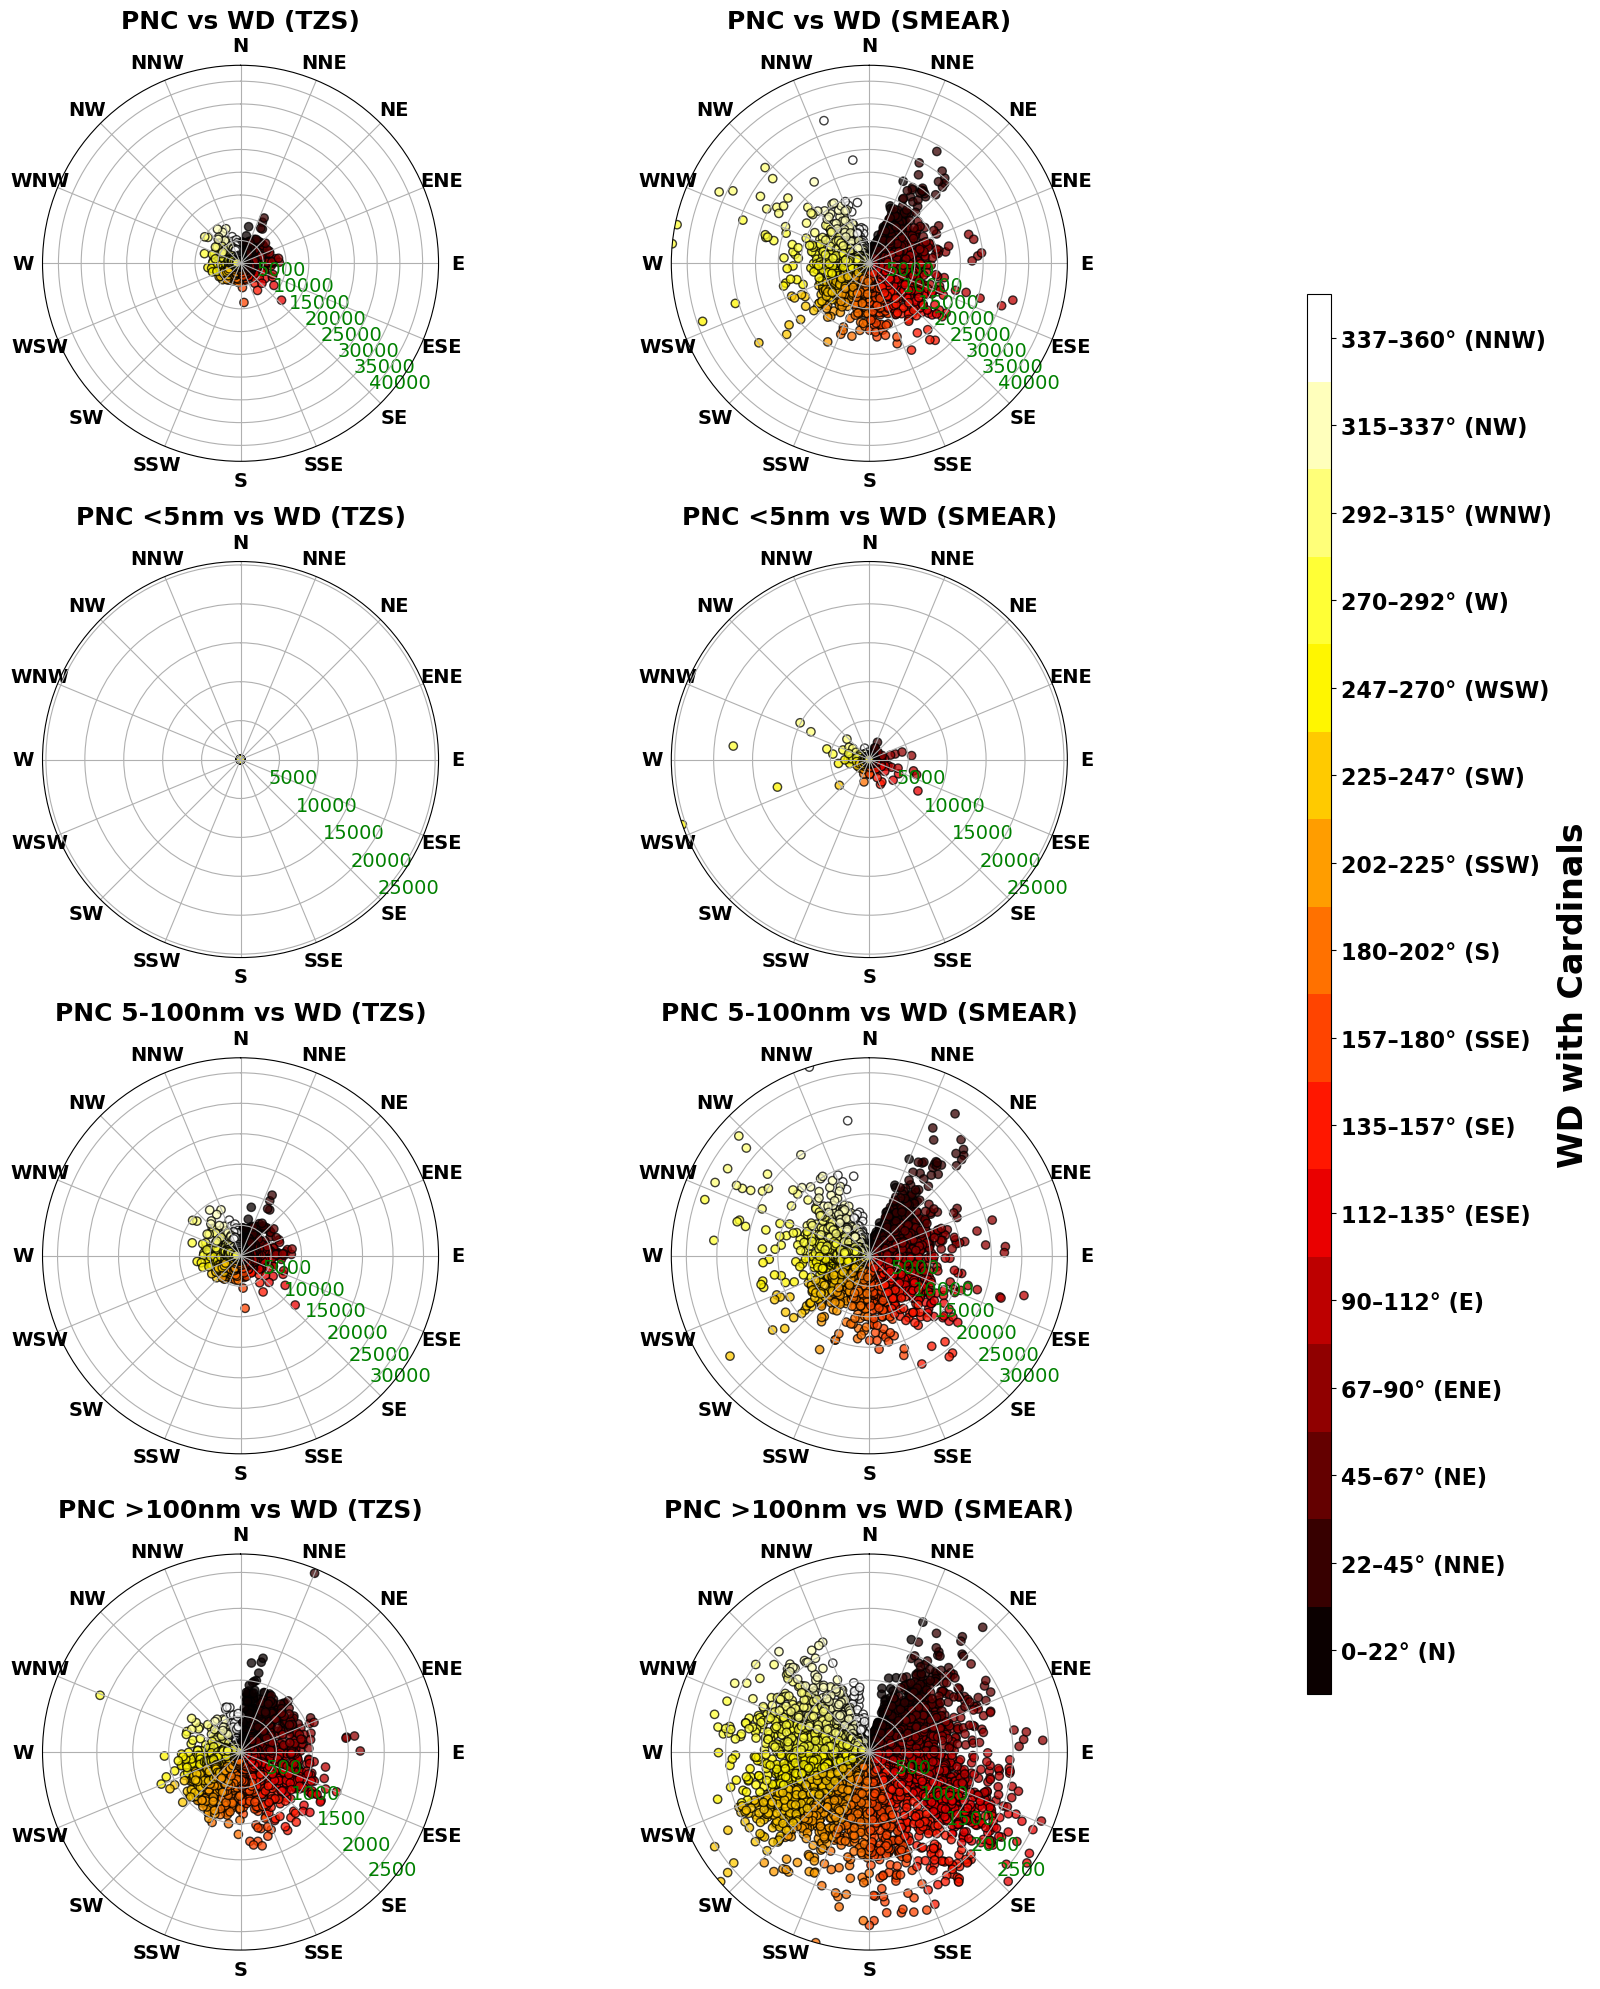

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- File Path ---
file_path = '/Users/touqeergill/Desktop/2. Polar plot TZS + SMEAR.xlsx'

# --- Define Sheet Info ---
sheet_info = [
    ('TZS (PNC)', 'SMEAR (PNC)', 'PNC'),
    ('TZS (PNC5nm)', 'SMEAR (PNC5nm)', 'PNC_below_5nm'),
    ('TZS (PNC5-100nm)', 'SMEAR (PNC5-100nm)', 'PNC_5_to_100nm'),
    ('TZS (PNC100nm)', 'SMEAR (PNC100nm)', 'PNC_above_100nm')
]

# --- Load Data ---
data_pairs = []
for tzs_sheet, smear_sheet, pnc_col in sheet_info:
    tzs_df = pd.read_excel(file_path, sheet_name=tzs_sheet).dropna(subset=['wd', pnc_col])
    smear_df = pd.read_excel(file_path, sheet_name=smear_sheet).dropna(subset=['wd', pnc_col])
    data_pairs.append((tzs_df, smear_df, pnc_col))

# --- Define Wind Sectors and Labels ---
direction_bins = np.arange(0, 361, 22.5)
bin_labels = [f'{int(direction_bins[i])}–{int(direction_bins[i+1])}' for i in range(len(direction_bins) - 1)]
cardinal_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                   'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
sorted_labels = sorted(bin_labels, key=lambda x: int(x.split('–')[0]))
label_to_index = {label: i for i, label in enumerate(sorted_labels)}
full_labels = [f'{deg}° ({card})' for deg, card in zip(sorted_labels, cardinal_labels)]

# --- Bin Wind Directions ---
for tzs_df, smear_df, _ in data_pairs:
    for df in [tzs_df, smear_df]:
        df['Wind_Sector'] = pd.cut(
            df['wd'], bins=direction_bins, labels=bin_labels,
            include_lowest=True, right=False
        )
        df['Sector_Index'] = df['Wind_Sector'].map(label_to_index)

# --- Colormap Setup ---
cmap_hot = plt.cm.get_cmap('hot', 16)
norm_hot = mcolors.BoundaryNorm(np.arange(-0.5, 16.5, 1), cmap_hot.N)

# --- Plotting Setup ---
fig, axs = plt.subplots(4, 2, subplot_kw=dict(polar=True), figsize=(16, 20))
titles = ['PNC', 'PNC <5nm', 'PNC 5-100nm', 'PNC >100nm']

# --- Plot Each Pair ---
for i, ((tzs_df, smear_df, pnc_col), row_axes, title) in enumerate(zip(data_pairs, axs, titles)):
    theta_tzs = np.deg2rad(tzs_df['wd'])
    theta_smear = np.deg2rad(smear_df['wd'])

    # --- Compute max PNC shared for the pair ---
    max_pnc_pair = max(tzs_df[pnc_col].max(), smear_df[pnc_col].max())

    # --- TZS Plot (Left) ---
    row_axes[0].scatter(
        theta_tzs, tzs_df[pnc_col],
        c=tzs_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.75, edgecolors='k', marker='o'
    )
    row_axes[0].set_title(f'{title} vs WD (TZS)', fontsize=18, fontweight='bold')
    row_axes[0].set_theta_zero_location('N')
    row_axes[0].set_theta_direction(-1)
    row_axes[0].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
    row_axes[0].set_xticklabels(cardinal_labels, fontsize=14, fontweight='bold')
    row_axes[0].set_ylim(0, max_pnc_pair)
    row_axes[0].set_rlabel_position(135)
    row_axes[0].tick_params(axis='y', labelsize=14, labelcolor='green')

    # --- SMEAR Plot (Right) ---
    row_axes[1].scatter(
        theta_smear, smear_df[pnc_col],
        c=smear_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.75, edgecolors='k', marker='o'
    )
    row_axes[1].set_title(f'{title} vs WD (SMEAR)', fontsize=18, fontweight='bold')
    row_axes[1].set_theta_zero_location('N')
    row_axes[1].set_theta_direction(-1)
    row_axes[1].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
    row_axes[1].set_xticklabels(cardinal_labels, fontsize=14, fontweight='bold')
    row_axes[1].set_ylim(0, max_pnc_pair)
    row_axes[1].set_rlabel_position(135)
    row_axes[1].tick_params(axis='y', labelsize=14, labelcolor='green')

# --- Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sc_for_colorbar = axs[0, 1].scatter([], [], c=[], cmap=cmap_hot, norm=norm_hot)
cbar = plt.colorbar(sc_for_colorbar, cax=cbar_ax, ticks=np.arange(len(full_labels)))
cbar.ax.set_yticklabels(full_labels, fontsize=16, fontweight='bold')
cbar.set_label('WD with Cardinals', fontsize=24, fontweight='bold')

# --- Final Layout ---
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/var/folders/4t/47wt24490m52zgk23b06kc9m0000gn/T/ipykernel_40549/1131696270.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


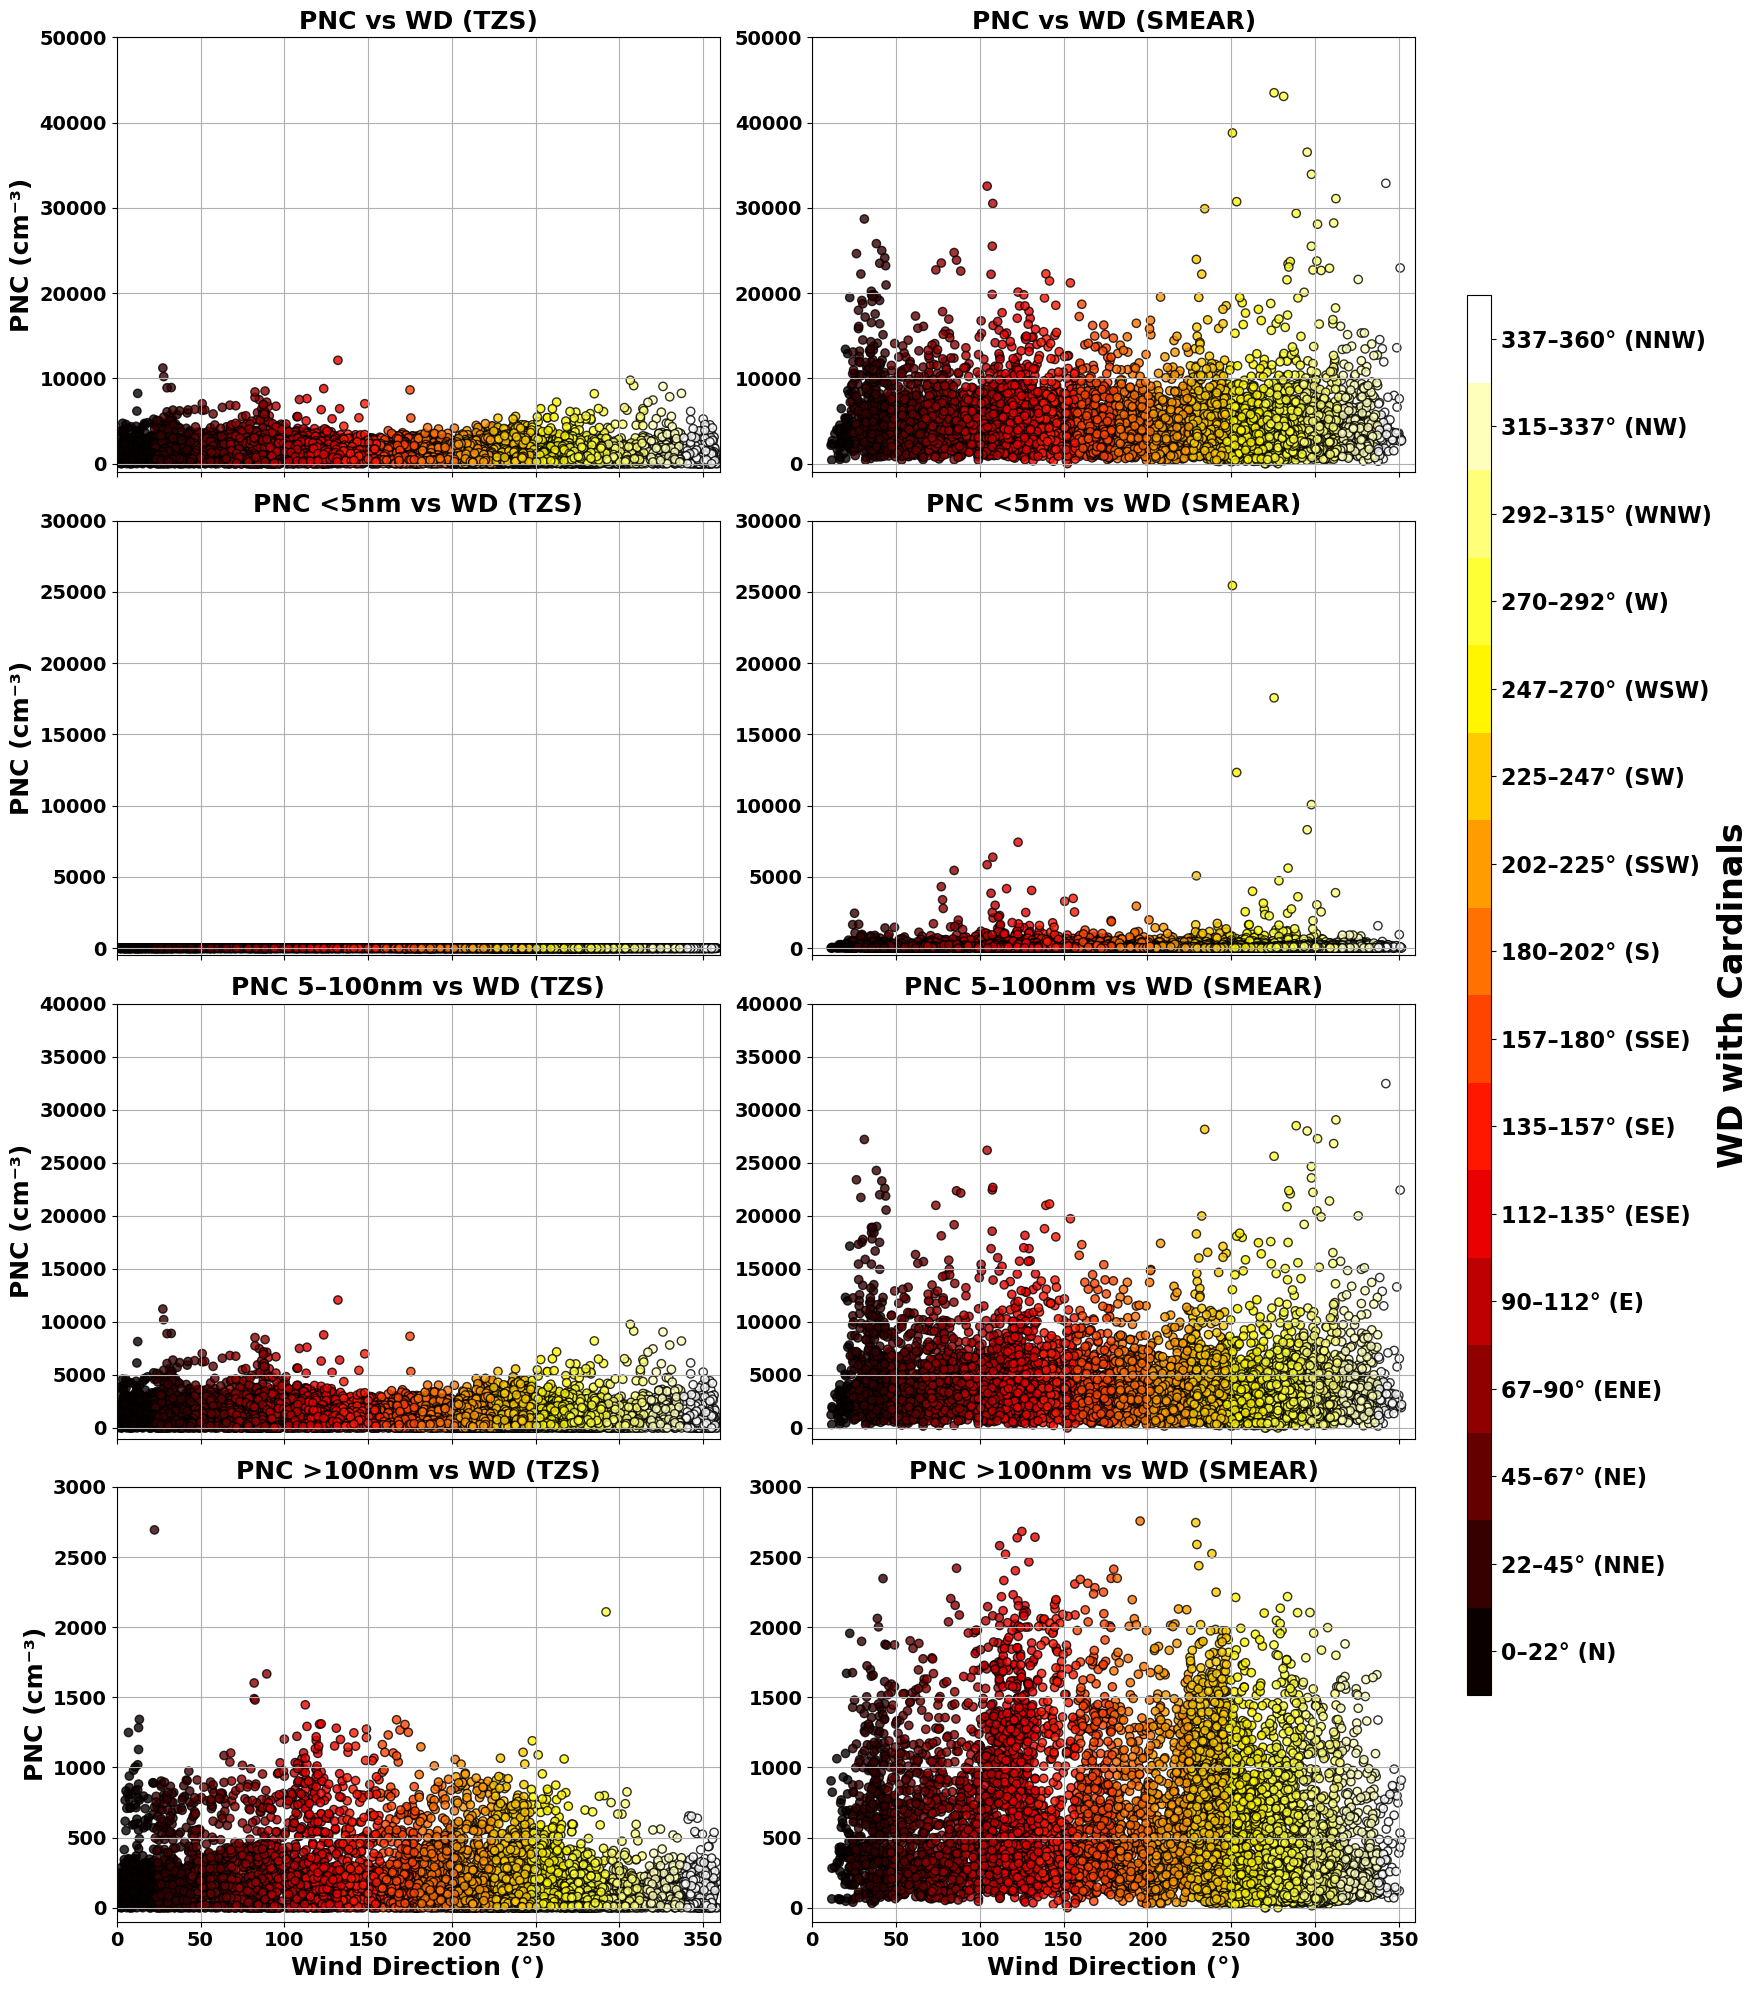

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- File Path ---
file_path = '/Users/touqeergill/Desktop/2. Polar plot TZS + SMEAR.xlsx'

# --- Define Sheet Info (same order as polar layout) ---
sheet_info = [
    ('TZS (PNC)', 'SMEAR (PNC)', 'PNC'),
    ('TZS (PNC5nm)', 'SMEAR (PNC5nm)', 'PNC_below_5nm'),
    ('TZS (PNC5-100nm)', 'SMEAR (PNC5-100nm)', 'PNC_5_to_100nm'),
    ('TZS (PNC100nm)', 'SMEAR (PNC100nm)', 'PNC_above_100nm')
]

# --- Load and Clean Data ---
data_pairs = []
for tzs_sheet, smear_sheet, pnc_col in sheet_info:
    tzs_df = pd.read_excel(file_path, sheet_name=tzs_sheet).dropna(subset=['wd', pnc_col])
    smear_df = pd.read_excel(file_path, sheet_name=smear_sheet).dropna(subset=['wd', pnc_col])
    data_pairs.append((tzs_df, smear_df, pnc_col))

# --- Define Wind Sectors and Cardinal Labels ---
direction_bins = np.arange(0, 361, 22.5)
bin_labels = [f'{int(direction_bins[i])}–{int(direction_bins[i+1])}' for i in range(len(direction_bins) - 1)]
cardinal_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                   'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
sorted_labels = sorted(bin_labels, key=lambda x: int(x.split('–')[0]))
label_to_index = {label: i for i, label in enumerate(sorted_labels)}
full_labels = [f'{deg}° ({card})' for deg, card in zip(sorted_labels, cardinal_labels)]

# --- Colormap Setup ---
cmap_hot = plt.cm.get_cmap('hot', 16)
norm_hot = mcolors.BoundaryNorm(np.arange(-0.5, 16.5, 1), cmap_hot.N)

# --- Create Subplots ---
fig, axs = plt.subplots(4, 2, figsize=(16, 20), sharex=True)
titles = ['PNC', 'PNC <5nm', 'PNC 5–100nm', 'PNC >100nm']

# --- Plot Each TZS/SMEAR Pair ---
for i, ((tzs_df, smear_df, pnc_col), row_axes, title) in enumerate(zip(data_pairs, axs, titles)):
    
    # Bin wind directions and assign sector index
    for df in [tzs_df, smear_df]:
        df['Wind_Sector'] = pd.cut(df['wd'], bins=direction_bins, labels=bin_labels, include_lowest=True, right=False)
        df['Sector_Index'] = df['Wind_Sector'].map(label_to_index)
    
    # Determine shared max PNC for row
    max_pnc = max(tzs_df[pnc_col].max(), smear_df[pnc_col].max())

    # --- TZS Plot ---
    row_axes[0].scatter(
        tzs_df['wd'], tzs_df[pnc_col],
        c=tzs_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.8, edgecolors='k', marker='o'
    )
    row_axes[0].set_title(f'{title} vs WD (TZS)', fontsize=18, fontweight='bold')
    row_axes[0].set_ylabel("PNC (cm⁻³)", fontsize=18, fontweight='bold')
    row_axes[0].grid(True)

    # --- SMEAR Plot ---
    row_axes[1].scatter(
        smear_df['wd'], smear_df[pnc_col],
        c=smear_df['Sector_Index'], cmap=cmap_hot, norm=norm_hot,
        alpha=0.8, edgecolors='k', marker='o'
    )
    row_axes[1].set_title(f'{title} vs WD (SMEAR)', fontsize=18, fontweight='bold')
    row_axes[1].grid(True)

    # Axis tweaks
    for ax in row_axes:
        ax.tick_params(axis='both', labelsize=14)
        for label in ax.get_xticklabels():
            label.set_fontweight('bold')
        for label in ax.get_yticklabels():
            label.set_fontweight('bold')
        ax.set_xlim(0, 360)

# --- Optional: Set custom Y-axis ranges for each row (modify as needed) ---
custom_y_limits = [
    (-1000, 50000),   # For PNC
    (-500, 30000),    # For PNC <5nm
    (-1000, 40000),   # For PNC 5–100nm
    (-100, 3000)      # For PNC >100nm
]

# Apply custom y-limits
for i, row_axes in enumerate(axs):
    for ax in row_axes:
        ax.set_ylim(custom_y_limits[i])

# --- Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sc_for_colorbar = axs[0, 1].scatter([], [], c=[], cmap=cmap_hot, norm=norm_hot)
cbar = plt.colorbar(sc_for_colorbar, cax=cbar_ax, ticks=np.arange(len(full_labels)))
cbar.ax.set_yticklabels(full_labels, fontsize=16, fontweight='bold')
cbar.set_label('WD with Cardinals', fontsize=24, fontweight='bold')

# --- Shared X-axis Label ---
for ax in axs[-1]:
    ax.set_xlabel("Wind Direction (°)", fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()